# DS CA3
## Task 1
Written by Babak Hosseini Mohtasham 810101408, Parsa Ahmadi 810101609 and Mahdy Naeini 810101536


### Libraries

In [118]:
from pyspark.sql.functions import udf
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))
from pyspark.sql import functions
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import ArrayType, StringType

## Warm-Up!

In [119]:
def show_df(df,n=5,truncate=True):
    print(f'Count of data frame is: {df.count()}')
    df.show(n,truncate=truncate)

In [120]:
stocks_spark = SparkSession.builder.appName('stocks').getOrCreate()

24/04/16 23:12:54 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [121]:
df_pyspark = stocks_spark.read.csv('stocks.csv',header=True,inferSchema=True)

In [122]:
show_df(df_pyspark)
df_pyspark.printSchema()
df_pyspark.describe().show()

Count of data frame is: 1762
+----------+----------+----------+------------------+------------------+---------+------------------+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|
+----------+----------+----------+------------------+------------------+---------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
+----------+----------+----------+------------------+------------------+---------+------------------+
only showing top 5 rows

root
 |-- Date: date (nullab

In [123]:
show_df(df_pyspark.drop()) #No null values

Count of data frame is: 1762
+----------+----------+----------+------------------+------------------+---------+------------------+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|
+----------+----------+----------+------------------+------------------+---------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
+----------+----------+----------+------------------+------------------+---------+------------------+
only showing top 5 rows



In [124]:
show_df(df_pyspark.filter(df_pyspark['Close'] < 500).select(['Open','Close','Volume']))

Count of data frame is: 1359
+----------+------------------+---------+
|      Open|             Close|   Volume|
+----------+------------------+---------+
|213.429998|        214.009998|123432400|
|214.599998|        214.379993|150476200|
|214.379993|        210.969995|138040000|
|    211.75|            210.58|119282800|
|210.299994|211.98000499999998|111902700|
+----------+------------------+---------+
only showing top 5 rows



In [125]:
show_df(df_pyspark.filter((df_pyspark['Open'] > 200) & (df_pyspark['Close'] < 200)).select(['Open', 'Close', 'Volume']))

Count of data frame is: 3
+------------------+----------+---------+
|              Open|     Close|   Volume|
+------------------+----------+---------+
|206.78000600000001|    197.75|220441900|
|        204.930004|199.289995|293375600|
|        201.079996|192.060003|311488100|
+------------------+----------+---------+



In [126]:
df_pyspark = df_pyspark.withColumn('Year', functions.year(df_pyspark['Date']))
show_df(df_pyspark)

Count of data frame is: 1762
+----------+----------+----------+------------------+------------------+---------+------------------+----+
|      Date|      Open|      High|               Low|             Close|   Volume|         Adj Close|Year|
+----------+----------+----------+------------------+------------------+---------+------------------+----+
|2010-01-04|213.429998|214.499996|212.38000099999996|        214.009998|123432400|         27.727039|2010|
|2010-01-05|214.599998|215.589994|        213.249994|        214.379993|150476200|27.774976000000002|2010|
|2010-01-06|214.379993|    215.23|        210.750004|        210.969995|138040000|27.333178000000004|2010|
|2010-01-07|    211.75|212.000006|        209.050005|            210.58|119282800|          27.28265|2010|
|2010-01-08|210.299994|212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|2010|
+----------+----------+----------+------------------+------------------+---------+------------------+----+
only sho

In [127]:
show_df(df_pyspark.groupBy('Year').min('Volume').withColumnRenamed('min(Volume)', 'minVolume'),10)

Count of data frame is: 7
+----+---------+
|Year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



In [128]:
df_pyspark = df_pyspark.withColumn('Month', functions.month(df_pyspark['Date']))
show_df(df_pyspark.groupBy(['Year', 'Month']).max('Low').withColumnRenamed('max(Low)', 'maxLow'), 100)

Count of data frame is: 84
+----+-----+------------------+
|Year|Month|            maxLow|
+----+-----+------------------+
|2012|   10|        665.550026|
|2010|    7|        260.300003|
|2010|   12|        325.099991|
|2015|    2|        131.169998|
|2014|    4|        589.799988|
|2015|   12|        117.809998|
|2016|    7|            103.68|
|2016|   11|        111.400002|
|2012|    8| 673.5400089999999|
|2013|    2|473.24997699999994|
|2012|    4| 626.0000150000001|
|2012|   12|        585.500023|
|2014|   10|        107.209999|
|2016|    5|             99.25|
|2014|   12|        115.290001|
|2013|    9|        503.479988|
|2013|   10|        525.110016|
|2014|    5|        628.900002|
|2016|    2|         96.650002|
|2013|   12| 566.4100269999999|
|2014|    1|        552.020004|
|2010|   11|        316.759987|
|2011|    3|        357.750004|
|2013|    3|        461.780022|
|2014|    8|        102.199997|
|2013|    6|447.38999900000005|
|2010|    6|        271.499992|
|2012|    7| 

In [129]:
df_pyspark.groupBy(['Year', 'Month']).max('Low').withColumnRenamed('max(Low)', 'maxLow').describe().show()

+-------+------------------+-----------------+------------------+
|summary|              Year|            Month|            maxLow|
+-------+------------------+-----------------+------------------+
|  count|                84|               84|                84|
|   mean|            2013.0|              6.5| 330.9219059404761|
| stddev|2.0120121200142433|3.472785764174839|195.21157232941835|
|    min|              2010|                1|         96.650002|
|    max|              2016|               12|        699.569977|
+-------+------------------+-----------------+------------------+



## Main Task

In [130]:
spark = SparkSession.builder.appName('spotify').getOrCreate()

24/04/16 23:12:56 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [131]:
df = spark.read.parquet('spotify.parquet', header=True, inferSchema=True)

In [132]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)



We found the definition of these features in the follownig link from the official spotify api documentation:
https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [133]:
show_df(df)

Count of data frame is: 1204025
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------+---+------------------+----+-----------+------------+----------------+--------+-------+-------+-----------+--------------+----+------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|danceability|energy|key|          loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|time_signature|year|release_date|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------+---+------------------+----+-----------+------------+----------------+--------+-------+-------+-----------+--------------+----+------------+
|7

In [134]:
df=df.withColumn('release_time', functions.to_unix_timestamp(df['release_date'], functions.lit('yyyy-MM-dd')))
show_df(df[['release_date','release_time']],20)

Count of data frame is: 1204025
+------------+------------+
|release_date|release_time|
+------------+------------+
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1999-11-02|   941488200|
|  1992-11-03|   720736200|
|  1992-11-03|   720736200|
|  1992-11-03|   720736200|
|  1992-11-03|   720736200|
|  1992-11-03|   720736200|
|  1992-11-03|   720736200|
|  1992-11-03|   720736200|
|  1992-11-03|   720736200|
+------------+------------+
only showing top 20 rows



In [135]:
indexer = StringIndexer(inputCol="album_id", outputCol="album_index")
df = indexer.fit(df).transform(df)

In [136]:
df= df.withColumn('explicit_int',df['explicit'].cast('int'))

In [137]:
show_df(df)

Count of data frame is: 1204025


24/04/16 23:12:58 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:12:58 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB


+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------+---+------------------+----+-----------+------------+----------------+--------+-------+-------+-----------+--------------+----+------------+------------+-----------+------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|danceability|energy|key|          loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|time_signature|year|release_date|release_time|album_index|explicit_int|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------+---+------------------+----+-----------+------------+----------------+--------+-------+-------+----

In [138]:
def get_all_numerical_cols(df):
    return [col[0] for col in df.dtypes if col[1] in ['double', 'bigint', 'int']]

In [139]:
def get_corr_matrix(df,numerical_cols):
    corr_matrix=[]
    for i in numerical_cols:
        matrix=[]
        for j in numerical_cols:
            matrix.append(df.corr(i,j))
        corr_matrix.append(matrix)
    return corr_matrix

We can see some interesting correlations in the graph below. The energy and loudness of a song is positively correlated which is logical because usually songs that are loud are eneretic as well. Furethermore, we can see acousticness is negatively correlated with energy. Moreover, there also other minor correlations that sound logic like: the positive correlations between valence and danceability, energy and valence, loudness and valence and negative correlations between loudness and acousticness and instrimentallness and loudness. Moreover, explicit is positively correlated with speechiness which is also logical because we know none of the songs with no speech can be explicit.

In [140]:
def draw_corr_matrix(corr_matrix,numerical_cols):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="Blues", xticklabels=numerical_cols,
                yticklabels=numerical_cols, annot_kws={'size': 6})
    plt.title("Correlation Matrix")
    plt.show()

24/04/16 23:13:02 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:05 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:08 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:11 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:14 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:17 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:20 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:23 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:26 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:29 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:31 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
24/04/16 23:13:34 WARN DAGScheduler: Broadcasting larg

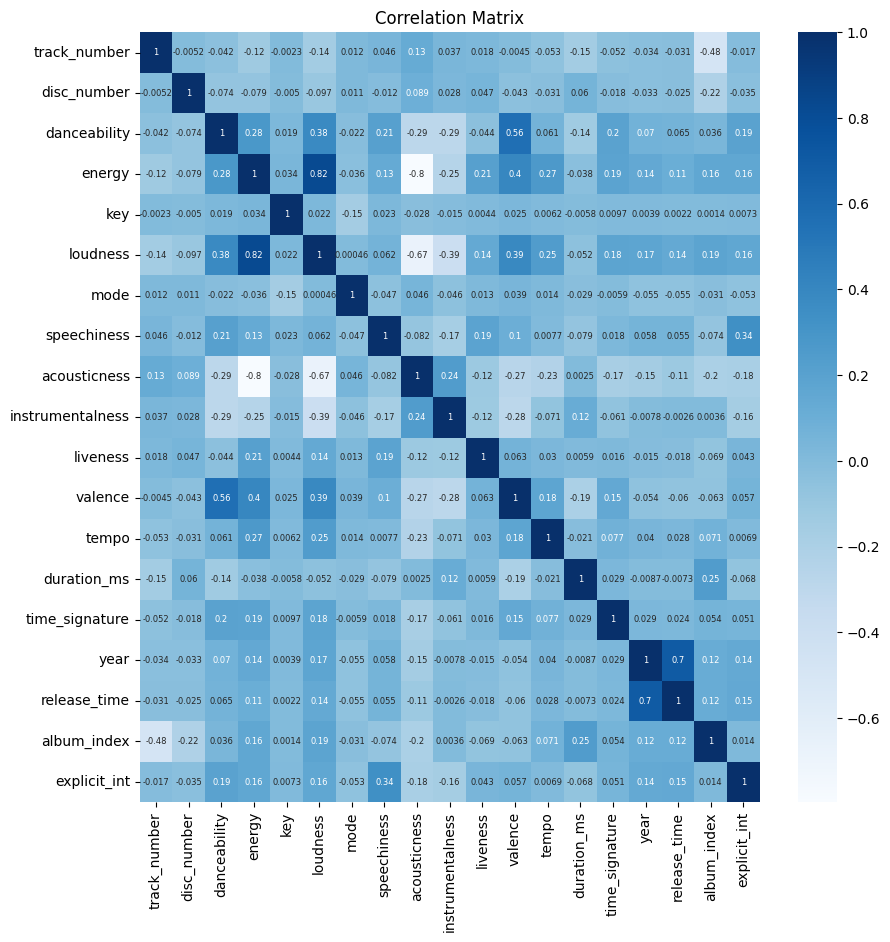

In [141]:
numerical_cols = get_all_numerical_cols(df)
corr = get_corr_matrix(df, numerical_cols)
draw_corr_matrix(corr, numerical_cols)

In [142]:
df=df.withColumn('duration_s',df['duration_ms']/1000)

In [143]:
cols = ['name', 'album', 'artists', 'explicit', 'duration_s', 'release_date','speechiness']

In [144]:
def print_top_songs(df,target,duration=0,speechiness=0,n=5):
    if duration:
        df = df.where(f'duration_s>={duration}')
    if speechiness:
        df = df.where(f'speechiness>={speechiness}')
    top_songs = df.orderBy(target, ascending=False).limit(n)
    print('Songs with highest {target}:')
    show_df(top_songs.select(cols+[target]), truncate=False)
    top_songs = df.orderBy(target, ascending=True).limit(n)
    print('Songs with lowest {target}:')
    show_df(top_songs.select(cols+[target]), truncate=False)

It's funny that by just looking at the song's name we can guess why they are int the tops. Like the Intermission - blank track which is probably just a blank track or the silent track. Another interesting observation is that all top 5 loudest songs are from the same artists for the same album.

In [145]:
print_top_songs(df,'loudness')

Songs with highest {target}:
Count of data frame is: 5


+--------------+-----+----------------+--------+----------+------------+-----------+-----------------+
|name          |album|artists         |explicit|duration_s|release_date|speechiness|loudness         |
+--------------+-----+----------------+--------+----------+------------+-----------+-----------------+
|Bucket        |Dash |['Sissy Spacek']|false   |36.62     |2010-02-01  |0.122      |7.234            |
|Mondo Employee|Dash |['Sissy Spacek']|false   |8.777     |2010-02-01  |0.0        |7.115            |
|Norge Est     |Dash |['Sissy Spacek']|false   |28.111    |2010-02-01  |0.126      |6.98             |
|Devil May Care|Dash |['Sissy Spacek']|false   |6.13      |2010-02-01  |0.0        |6.863            |
|(The) Repulse |Dash |['Sissy Spacek']|false   |13.473    |2010-02-01  |0.0        |6.797999999999999|
+--------------+-----+----------------+--------+----------+------------+-----------+-----------------+

Songs with lowest {target}:
Count of data frame is: 5


+--------------------------+--------------------------+--------------------+--------+----------+------------+-----------+--------+
|name                      |album                     |artists             |explicit|duration_s|release_date|speechiness|loudness|
+--------------------------+--------------------------+--------------------+--------+----------+------------+-----------+--------+
|Live Studio Jam           |For Now We Know: In Part 1|['Headnoise']       |false   |8.04      |2005-01-01  |0.0        |-60.0   |
|In Remembrance            |Khaooohs and Kon-Fus-Ion  |['Pan.Thy.Monium']  |false   |60.4      |1996-03-19  |0.0        |-60.0   |
|The World's Beat          |For Now We Know: In Part 1|['Headnoise']       |false   |8.0       |2005-01-01  |0.0        |-60.0   |
|Silent Track              |Walking Distance          |['Robert Earl Keen']|false   |60.372    |1998-10-27  |0.0        |-60.0   |
|Intermission - blank track|The Bloody Hand           |['Frog Eyes']       |false  

Again we can guess dig your grave to be a low valence song. also the second lowest valence song is for the same artist and same album.

In [146]:
print_top_songs(df, 'valence')

Songs with highest {target}:
Count of data frame is: 5
+-------------------------------------+----------------------------+------------------+--------+----------+------------+-----------+-------+
|name                                 |album                       |artists           |explicit|duration_s|release_date|speechiness|valence|
+-------------------------------------+----------------------------+------------------+--------+----------+------------+-----------+-------+
|Let It Snoki Doki Panic (Bonus Track)|8-Bit Jesus                 |['Doctor Octoroc']|false   |66.96     |2008-12-20  |0.122      |1.0    |
|Itsy Bitsy Spider                    |Rhymin' to the Beat, Vol. 1 |['Jack Hartmann'] |false   |100.0     |1996-01-01  |0.0561     |1.0    |
|Genie                                |History: Mission & Tradition|['The Gravel Pit']|false   |25.867    |1997-01-01  |0.166      |1.0    |
|The Drunken Landlady                 |The Family Album            |['The McCarthys'] |false   |79.

We can see the word silence in two of the songs with lowest energy.

In [147]:
print_top_songs(df, 'energy')

Songs with highest {target}:
Count of data frame is: 5
+---------------------+------------------------------------------------+---------------+--------+----------+------------+-----------+------+
|name                 |album                                           |artists        |explicit|duration_s|release_date|speechiness|energy|
+---------------------+------------------------------------------------+---------------+--------+----------+------------+-----------+------+
|Soft Water Rhinoceros|Tauromachine                                    |['Merzbow']    |false   |538.827   |1998        |0.247      |1.0   |
|Skald Au Satans Sol  |Transilvanian Hunger (20th Anniversary Edition) |['Darkthrone'] |false   |268.053   |2014-12-01  |0.16       |1.0   |
|Bumba (A Buddha)     |Watch the Great Copy Cat                        |['Robert Görl']|false   |364.533   |1996        |0.0669     |1.0   |
|Did You Cum?         |Peanut Butter and Jelly Live at the Ginger Minge|['Coachwhips'] |false   |77

In [148]:
print_top_songs(df, 'danceability')

Songs with highest {target}:
Count of data frame is: 5
+------------------------------------+----------------------------------------------+--------------------+--------+----------+------------+-----------+------------+
|name                                |album                                         |artists             |explicit|duration_s|release_date|speechiness|danceability|
+------------------------------------+----------------------------------------------+--------------------+--------+----------+------------+-----------+------------+
|Unendlich                           |Versammlung 1                                 |['Wolfgang Voigt']  |false   |618.32    |2015-02-16  |0.369      |1.0         |
|Na-try Mo Na Ba Ako                 |Clean                                         |['Andrew E.']       |false   |243.293   |2007-02-27  |0.0971     |0.994       |
|Roll Like Dis / Cha-cha Slide Part 2|Mr. C Presents The Cha-cha Slide Greatest Hits|['Mr. C']           |false   |271.7

In [149]:
print_top_songs(df, 'duration_s')

Songs with highest {target}:
Count of data frame is: 5


+-----------------------------------------------------+-----------------------------------+--------------------------------+--------+----------+------------+------------------+----------+
|name                                                 |album                              |artists                         |explicit|duration_s|release_date|speechiness       |duration_s|
+-----------------------------------------------------+-----------------------------------+--------------------------------+--------+----------+------------+------------------+----------+
|Bargrooves Deluxe Edition 2018 Mix 2 - Continuous Mix|Bargrooves Deluxe Edition 2018     |['Various Artists']             |false   |6061.09   |2018-03-30  |0.0658            |6061.09   |
|Doctorow's Third Law                                 |Information Doesn't Want to Be Free|['Wil Wheaton', 'Cory Doctorow']|false   |6054.655  |2014-12-10  |0.8909999999999999|6054.655  |
|Gothic Lolita                                        |The O

Some of these songs aren't even 1 minute long so they probably can't be considered as songs let's just choose songs that are at least a minute long in the next cells. Also to make sure they aren't just tracks without any spoken words let's filter the songs with speechiness between 0.33 and 0.66.

In [150]:
print_top_songs(df, 'loudness', duration=60, speechiness=0.33)

Songs with highest {target}:
Count of data frame is: 5
+-----------------------+------------------------------+-------------------+--------+----------+------------+------------------+-----------------+
|name                   |album                         |artists            |explicit|duration_s|release_date|speechiness       |loudness         |
+-----------------------+------------------------------+-------------------+--------+----------+------------+------------------+-----------------+
|Comic Mirror           |Corpus                        |['Sissy Spacek']   |false   |944.313   |2020-06-05  |0.501             |5.382999999999999|
|Shinkansen High Tension|I Love Guitar Wolf...Very Much|['Total Dork']     |false   |230.6     |2005-09-20  |0.499             |4.232            |
|LURK                   |BEST HOUSE ON A BAD BLOCK     |['1 800 PAIN']     |true    |182.592   |2020-09-11  |0.503             |3.508            |
|Peak Everything/ 1     |Corpus                        |['Sissy

In [151]:
print_top_songs(df, 'valence', duration=60, speechiness=0.33)

Songs with highest {target}:
Count of data frame is: 5
+-------------------------------------------------+-----------------------------------------------------------+-----------------------------------------------------+--------+----------+------------+------------------+-------+
|name                                             |album                                                      |artists                                              |explicit|duration_s|release_date|speechiness       |valence|
+-------------------------------------------------+-----------------------------------------------------------+-----------------------------------------------------+--------+----------+------------+------------------+-------+
|Old Joe / The Boat Is Going Over / Untitled Polka|Voice of the People 14: Troubles They Are But Few          |['Percy Brown']                                      |false   |160.173   |1997-01-01  |0.4               |1.0    |
|Keep On Driving                         

In [152]:
print_top_songs(df, 'energy', duration=60, speechiness=0.33)

Songs with highest {target}:
Count of data frame is: 5
+----------------------------------+--------------------+---------------------+--------+----------+------------+------------------+------+
|name                              |album               |artists              |explicit|duration_s|release_date|speechiness       |energy|
+----------------------------------+--------------------+---------------------+--------+----------+------------+------------------+------+
|Vixens In Space                   |Horndog Fest        |['The Dirtbombs']    |false   |138.16    |1998-06-22  |0.407             |1.0   |
|Wind Chime Waterfall 1            |Wind Chime Waterfall|['Global Journey']   |false   |337.373   |2006-09-12  |0.664             |1.0   |
|She Blinded Me With Playtex       |Horndog Fest        |['The Dirtbombs']    |false   |90.307    |1998-06-22  |0.528             |1.0   |
|Deadly Dreams                     |Devil's Punchbowl   |['The Frankenburies']|false   |91.16     |2004        

In [153]:
print_top_songs(df, 'danceability', duration=60, speechiness=0.33)

Songs with highest {target}:
Count of data frame is: 5
+----------------------------+-------------------------------------------------------------+-----------------------+--------+----------+------------+------------------+------------+
|name                        |album                                                        |artists                |explicit|duration_s|release_date|speechiness       |danceability|
+----------------------------+-------------------------------------------------------------+-----------------------+--------+----------+------------+------------------+------------+
|Unendlich                   |Versammlung 1                                                |['Wolfgang Voigt']     |false   |618.32    |2015-02-16  |0.369             |1.0         |
|Techno Is Not Fault         |Techno Is Not Fault                                          |['Andrea HEinstein']   |false   |337.058   |2018-06-08  |0.406             |0.992       |
|Cheesy Mobisi               |Halle

Interestingly Narcose is in the top 5 songs with least loudness, valence, energy and danceability!

Now let's find interesting facts about artists.

In [154]:
@udf(ArrayType(StringType()))
def string_to_array(row):
    return eval(row)

df_artist = df.withColumn('artist', functions.explode(string_to_array(df.artists)))

We can see some famous composers and musicians among the top artists with most number of songs. The artist with most number of songs is the famous Bach with more than 180000 musics on spotify! We can also see the name of the famous Mozart with more than 110000 songs on spotify.

In [155]:
show_df(df_artist.groupBy('artist').count().orderBy(
    'count', ascending=False), n=5,truncate=False)

Count of data frame is: 137454


+-----------------------+-----+
|artist                 |count|
+-----------------------+-----+
|Johann Sebastian Bach  |9708 |
|Ludwig van Beethoven   |5768 |
|Wolfgang Amadeus Mozart|3919 |
|George Frideric Handel |3096 |
|Antonio Vivaldi        |2901 |
+-----------------------+-----+
only showing top 5 rows



Let's see which singers have highest number of songs. 

We can see many of the Mozart's tracks uncorrectly have high speechiness so let's increase speechiness.

In [156]:
show_df(df_artist.where('speechiness>=0.33').where('duration_s>=60').groupBy('artist').count().orderBy(
    'count', ascending=False), n=5, truncate=False)

Count of data frame is: 21333
+--------------+-----+
|artist        |count|
+--------------+-----+
|Noam Chomsky  |374  |
|Howard Zinn   |312  |
|TKKG          |284  |
|Georg Kreisler|168  |
|Mac Dre       |165  |
+--------------+-----+
only showing top 5 rows



In [157]:
show_df(df_artist.where('speechiness>=0.66').where('duration_s>=60').groupBy('artist').count().orderBy(
    'count', ascending=False), n=5, truncate=False)

Count of data frame is: 3910
+-----------------+-----+
|artist           |count|
+-----------------+-----+
|Noam Chomsky     |292  |
|Howard Zinn      |283  |
|TKKG             |240  |
|Helmut Qualtinger|115  |
|Jello Biafra     |99   |
+-----------------+-----+
only showing top 5 rows



And here is the number of tracks for music composers.

In [158]:
show_df(df_artist.where('speechiness<0.33').where('duration_s>=60').groupBy('artist').count().orderBy(
    'count', ascending=False), n=5, truncate=False)

Count of data frame is: 131682


+-----------------------+-----+
|artist                 |count|
+-----------------------+-----+
|Johann Sebastian Bach  |8863 |
|Ludwig van Beethoven   |5337 |
|Wolfgang Amadeus Mozart|3735 |
|Antonio Vivaldi        |2806 |
|George Frideric Handel |2697 |
+-----------------------+-----+
only showing top 5 rows



Here are the artists whose songs have average high valence.

In [181]:
show_df(df_artist.where('speechiness>=0.33').where('duration_s>=60').groupBy('artist').avg().orderBy(
    'avg(valence)', ascending=False).select(['artist','avg(valence)']), n=5, truncate=False)

Count of data frame is: 21333
+----------------+------------+
|artist          |avg(valence)|
+----------------+------------+
|Percy Brown     |1.0         |
|Justin McRoberts|0.994       |
|Will Atikinson  |0.985       |
|Generichrist    |0.984       |
|Mendoza Colacho |0.983       |
+----------------+------------+
only showing top 5 rows



## Questions

1. **Read about how Spark and Hadoop work. What does the term ‘lazy evaluation’ mean
for them? Explain with a simple example.**\
With Spark, only one-step is needed where data is read into memory, operations performed, and the results written back—resulting in a much faster execution. Spark also reuses data by using an in-memory cache to greatly speed up machine learning algorithms that repeatedly call a function on the same dataset.\
Hadoop is an open source framework based on Java that manages the storage and processing of large amounts of data for applications. Hadoop uses distributed storage and parallel processing to handle big data and analytics jobs, breaking workloads down into smaller workloads that can be run at the same time.\
Lazy evaluation is an evaluation strategy which holds the evaluation of an expression until its value is needed. It avoids repeated evaluation.\
In Python 3.x the range() function[29] returns a generator which computes elements of the list on demand. Elements are only generated when they are needed (e.g., when print(r[3]) is evaluated in the following example), so this is an example of lazy or deferred evaluation:
```python
    >>> r = range(10)
    >>> print(r)
    range(0, 10)
    >>> print(r[3])
    3

2. **Your main task’s dataset has about 1,200,000 rows, which makes it quite hard, and even sometimes impossible, to work with. Explain how parquet files try to solve this problem, compared to normal file formats like csv.**\
Parquet file format is a columnar storage format, which means that data for each column is stored together. The storage mechanism enables better compression and typically results in smaller file sizes compared to row-based formats. CSV is a row-based format, where each row is represented as a separate line in the file.

3. **Parquet file format is a columnar storage format, which means that data for each column is stored together. The storage mechanism enables better compression and typically results in smaller file sizes compared to row-based formats. CSV is a row-based format, where each row is represented as a separate line in the file.**\
`DataFrame.checkpoint(eager=True)`: Returns a checkpointed version of this Dataset. Checkpointing can be used to truncate the logical plan of this DataFrame, which is especially useful in iterative algorithms where the plan may grow exponentially. It will be saved to files inside the checkpoint directory set with `SparkContext.setCheckpointDir()`. Though when I tried this function the size of the saved files can get more than 1 giga bytes.\
Like this:

```python
    functions.SparkContext.setCheckpointDir(spark,'checkpoint_for_spark')
    df.checkpoint()

4. **Top companies stream their data on a regular routine, e.g. daily. How can we save data, so that we could filter it based on specific columns, e.g. date, faster than regular filtering?**\
A column-oriented DBMS or columnar DBMS is a database management system (DBMS) that stores data tables by column rather than by row. Benefits include more efficient access to data when only querying a subset of columns (by eliminating the need to read columns that are not relevant), and more options for data compression. However, they are typically less efficient for inserting new data. It is responsible for speeding up the time required to return a particular query. It also is responsible for greatly improving the disk I/O performance. It is helpful in data analytics and data warehousing.\
* When to use the Columnar Database:
1. Queries that involve only a few columns.
2. Compression but column-wise only.
3. Clustering queries against a huge amount of data.
* Advantages of Columnar Database:
1. Columnar databases can be used for different tasks such as when the applications that are related to big data comes into play then the 2.column-oriented databases have greater attention in such case.
2. The data in the columnar database has a highly compressible nature and has different operations like (AVG), (MIN, MAX), which are permitted by the compression.
3. Efficiency and Speed: The speed of Analytical queries that are performed is faster in columnar databases.
4. Self-indexing: Another benefit of a column-based DBMS is self-indexing, which uses less disk space than a relational database management system containing the same data.
* Limitation of Columnar Database:
1. For loading incremental data, traditional databases are more relevant as compared to column-oriented databases.
2. For Online transaction processing (OLTP) applications, Row oriented databases are more appropriate than columnar databases.

5. **Let's face off Pandas and PySpark in the data analysis arena! When does each library truly shine, and why? Consider factors like data size, processing complexity, and user experience**
* **Ease of Use**: Pandas is generally easier to use and has a lower learning curve compared to PySpark. The pandas API is simple and the syntax is similar to SQL and Excel. This makes it easy for analysts and data scientists to get started with data analysis and manipulation using pandas.
* **Interactivity**: Pandas provides an interactive environment for data exploration and analysis through Jupyter notebooks. This allows us to visualize data and experiment with code more easily. PySpark, on the other hand, can have a higher barrier to entry. It requires setting up a distributed computing cluster before running code.
* **Well-suited for small to medium-sized data**: Pandas is well-suited for handling small to medium-sized datasets that can fit in memory. It provides fast and efficient data manipulation and processing on a single machine, without requiring distributed computing resources.
* **Flexibility**: The pandas module is highly flexible and can work with a wide variety of data sources. We can use CSV, Excel, SQL databases, parquet files, and more. It also provides a wide range of data manipulation functions that can handle complex data transformation tasks.
* **Integration with Other Libraries**: Pandas integrates well with other data science libraries in the Python ecosystem, such as NumPy, Matplotlib, and Scikit-learn. This makes it easy to build end-to-end data analysis pipelines and machine learning workflows using a variety of tools.
* **Community Support**: Pandas has a large and active community of users and contributors. It also has extensive documentation that explains each function with examples. This makes it easy to find help and resources when working with Pandas.
* **Scalability**: PySpark is designed to handle large-scale datasets and distributed computing. Using pyspark, we can perform parallel processing across a cluster of machines. We can split data into smaller partitions and perform parallel processing on them. This makes pyspark faster and more efficient than Pandas for large-scale data processing.
* **Distributed Computing**: PySpark can distribute computations across a cluster of machines. This helps us process large-scale data that may not fit into the memory of a single machine. Due to this, PySpark is ideal for big data processing.
* **Speed**: PySpark is faster than Pandas when processing large datasets. It can leverage the computing power of a cluster of machines to perform parallel processing. This can significantly reduce processing times.
* **Integration with Big Data Tools**: PySpark integrates with a wide range of big data tools and technologies, including Hadoop, Hive, Cassandra, and HBase. This makes it easier to work with large datasets stored in distributed file systems and other big data stores.
* **Integration with Hadoop Ecosystem**: PySpark integrates seamlessly with the Hadoop ecosystem. This enables us to work with data stored in Hadoop Distributed File System (HDFS) and other data sources such as HBase, Hive, and Cassandra.
* **Streaming Data Processing**: PySpark Streaming allows users to process real-time data streams using Spark’s distributed computing capabilities. It can ingest data from various sources, including Kafka, Flume, and Twitter, and process them in near real-time. Pandas doesn’t have any such feature.